https://www.askpython.com/python/examples/pipelining-in-python#:~:text=The%20pipeline%20is%20a%20Python%20scikit-learn%20utility%20for,linked%20together%2C%20resulting%20in%20a%20measurable%20modeling%20process. 

The pipeline is a Python scikit-learn utility for orchestrating machine learning operations.

The objective is to guarantee that all phases in the pipeline, such as training datasets or each of the fold involved in the cross-validation technique, are limited to the data available for the assessment.

# Data Preparation and Modeling For Pipelining

The leaking of data from your training dataset to your test dataset is a common pitfall in machine learning and data science.

Data preparation is such a simple approach for the algorithm to acquire access to the entire training dataset. For example, normalizing or standardizing the entire training dataset before learning would not be a proper test because the scale of the data in the test set would have influenced the training dataset

Pipelines ensure that data preparation, such as normalization, is restricted to each fold of our cross-validation operation, minimizing data leaks in our test harness.

There are two steps in the pipeline:
- Ensure that the data is uniform.
- Understand how to use a Linear Discriminant Analysis model.

# Importing libraries

In [13]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

In [5]:
#Load data
df = pd.read_csv("data_cat1.csv")

For now we'll be droping the country column :

In [6]:
df = df.drop(df.columns[0], axis=1)

In [7]:
df = df.drop('Country',axis=1)

In [8]:
df['tier'] = df['tier'].replace(['First','Second','Third'],['1','2','3'])
df['tier'] = df['tier'].astype(float)

In [9]:
df_copy = df

In [10]:
# Creating independent and dependent variables
X = df_copy.drop('tier',axis=1)
y = df_copy['tier']

In [11]:
from sklearn.model_selection import train_test_split
# Splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Train Data: {X_test.shape}, {y_test.shape}")

Train Data: (744, 9), (744,)
Train Data: (187, 9), (187,)


# Pipeline

In [14]:
from sklearn.pipeline import Pipeline
# The sequence of pipe flow is :
# PCA dimension is reduced by 2 >> Data gets scaled >> Classification of decission tree
pipe = Pipeline([('pca', PCA(n_components = 2)), ('std', StandardScaler()), ('decision_tree', DecisionTreeClassifier())], verbose = True)
 
# fitting the data in the pipeline
pipe.fit(X_train, y_train)


[Pipeline] ............... (step 1 of 3) Processing pca, total=   0.2s
[Pipeline] ............... (step 2 of 3) Processing std, total=   0.0s
[Pipeline] ..... (step 3 of 3) Processing decision_tree, total=   0.0s


Pipeline(steps=[('pca', PCA(n_components=2)), ('std', StandardScaler()),
                ('decision_tree', DecisionTreeClassifier())],
         verbose=True)

pipe.get_params()  method returns a dictionary of the parameters and descriptions of each classes in the pipeline. 

In [16]:
pipe.get_params()

{'memory': None,
 'steps': [('pca', PCA(n_components=2)),
  ('std', StandardScaler()),
  ('decision_tree', DecisionTreeClassifier())],
 'verbose': True,
 'pca': PCA(n_components=2),
 'std': StandardScaler(),
 'decision_tree': DecisionTreeClassifier(),
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': 2,
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'std__copy': True,
 'std__with_mean': True,
 'std__with_std': True,
 'decision_tree__ccp_alpha': 0.0,
 'decision_tree__class_weight': None,
 'decision_tree__criterion': 'gini',
 'decision_tree__max_depth': None,
 'decision_tree__max_features': None,
 'decision_tree__max_leaf_nodes': None,
 'decision_tree__min_impurity_decrease': 0.0,
 'decision_tree__min_impurity_split': None,
 'decision_tree__min_samples_leaf': 1,
 'decision_tree__min_samples_split': 2,
 'decision_tree__min_weight_fraction_leaf': 0.0,
 'decision_tree__random_state': None,
 'decision_tree__splitter':

# Evaluation metrics

## Accuracy

In [15]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pipe.predict(X_test)))

1.0


## Confusion matrix

In [19]:
# importing all necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# confusion_matrix funnction a matrix containing the summary of predictions
print(confusion_matrix(y_test, pipe.predict(X_test)))


[[56  0  0]
 [ 0 59  0]
 [ 0  0 72]]


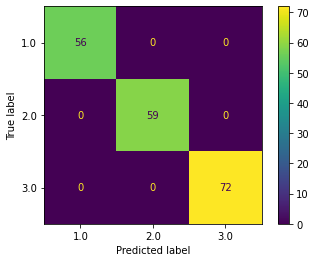

In [22]:
# plot_confusion_matrix function is used to visualize the confusion matrix
plot_confusion_matrix(pipe, X_test, y_test)
plt.show()